# Riddler Classic: MatchingSocks
Posted by FiveThirtyEight on Dec 20, 2019

> I have ***n***  pairs of socks in a drawer. Each pair is distinct from another and consists of two matching socks. Alas, I’m negligent when it comes to folding my laundry, and so the socks are not folded into pairs. This morning, fumbling around in the dark, I pull the socks out of the drawer, randomly and one at a time, until I have a matching pair of socks among the ones I’ve removed from the drawer.
>
> On average, how many socks will I pull out of the drawer in order to get my first matching pair?


In [119]:
import numpy as np

def match_socks(n_socks):
    socks = list(range(n_socks))*2
    # print('{} sock pairs in the drawer'.format(n_socks))
    for i in range(n_socks*2):
        sock_pick = np.random.choice(socks)
        # print('You picked sock {}'.format(sock_pick))
        socks.remove(sock_pick)
        if sock_pick not in socks:
            # print('Sock matched! You now have a matching pair of sock', sock_pick)
            # print('It took {} tries to match a pair'.format(i+1))
            # print(socks)
            return i+1
        # print('No match found yet. Picking another one')
        # print(socks)

In [120]:
match_socks(10)

10

In [149]:
iterations = 1000
iter_list = np.zeros(iterations)
n_socks = 1
attempts = []
while n_socks < 101:
    for i in range(iterations):
        iter_list[i] = match_socks(n_socks)
    if n_socks % 10 == 0:
        print('For {0} sock pairs, it will take {1} tries on average '
              'to find a matching pair'.format(n_socks, np.average(iter_list)))
    attempts.append(np.average(iter_list))
    n_socks += 1

For 10 sock pairs, it will take 5.639 tries on average to find a matching pair
For 20 sock pairs, it will take 8.092 tries on average to find a matching pair
For 30 sock pairs, it will take 9.861 tries on average to find a matching pair
For 40 sock pairs, it will take 11.059 tries on average to find a matching pair
For 50 sock pairs, it will take 12.705 tries on average to find a matching pair
For 60 sock pairs, it will take 13.862 tries on average to find a matching pair
For 70 sock pairs, it will take 15.122 tries on average to find a matching pair
For 80 sock pairs, it will take 15.723 tries on average to find a matching pair
For 90 sock pairs, it will take 16.683 tries on average to find a matching pair
For 100 sock pairs, it will take 17.309 tries on average to find a matching pair


The answer at https://fivethirtyeight.com/features/can-you-solve-the-vexing-vexillology/ reveals that as N gets bigger, the average number of socks needed for a pair approaches `sqrt(pi * N)`. There is an explanation at: https://hectorpefo.github.io/prepublication/2019-12-21-Sock-Matching/

In [151]:
n_socks

101

In [155]:
diff_approach = []
for i in range(1, n_socks):
    diff_approach.append(np.sqrt(np.pi * i))

## Visualizations

<module 'matplotlib.pyplot' from 'C:\\Users\\aksin\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

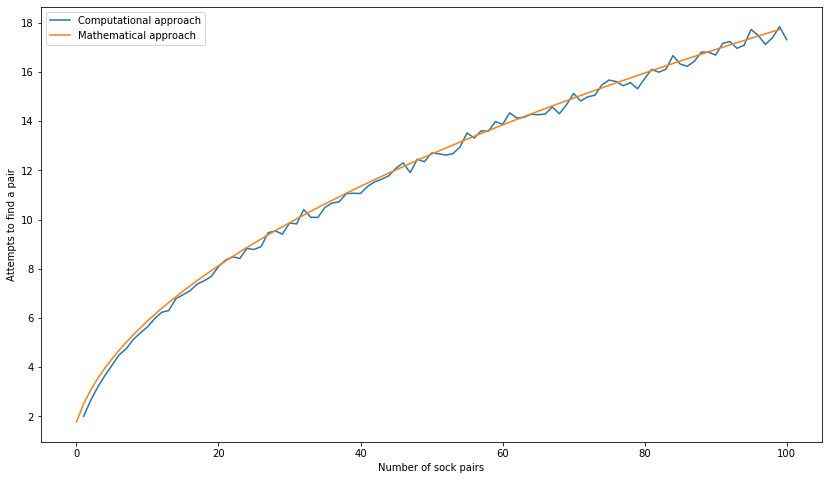

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(range(1, n_socks), attempts, diff_approach)
plt.xlabel('Number of sock pairs')
plt.ylabel('Attempts to find a pair')
plt.legend(labels=('Computational approach', 'Mathematical approach'))
plt